In [22]:
# Created by: Michael Cullen
# 08/10/2024

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import csv
import seaborn as sns

In [24]:
df = pd.read_csv('Average-prices-2024-06.csv', header=0)  # Header=0 to use the first row as column names

print(df.head())  # Display the first few rows to verify
print(df.columns)  # Display column names



         Date       Region_Name  Area_Code  Average_Price  Monthly_Change  \
0  1968-04-01  Northern Ireland  N92000001    3661.485500             0.0   
1  1968-04-01           England  E92000001    3408.108064             0.0   
2  1968-04-01             Wales  W92000004    2885.414162             0.0   
3  1968-04-01          Scotland  S92000003    2844.980688             0.0   
4  1968-04-01            London  E12000007    4418.489911             0.0   

   Annual_Change  Average_Price_SA  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN  
Index(['Date', 'Region_Name', 'Area_Code', 'Average_Price', 'Monthly_Change',
       'Annual_Change', 'Average_Price_SA'],
      dtype='object')


In [25]:
df = shuffle(df, random_state=42)  # Shuffle the data

# Define split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Calculate indices
train_end = int(train_size * len(df))
val_end = int((train_size + val_size) * len(df))

# Split the data
train_data = df[0:train_end] # start to 70%
val_data = df[train_end:val_end] # 70% - 85%
test_data = df[val_end:len(df)] # 85% - end

print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")

Training set: 99256 samples
Validation set: 21269 samples
Test set: 21270 samples


In [26]:
# Train Data
X_train = train_data.drop('Average_Price', axis=1)  # Features
y_train = train_data['Average_Price']  # Target

# Validation Data
X_val = val_data.drop('Average_Price', axis=1)  # Features
y_val = val_data['Average_Price']  # Target

# Test Data
X_test = test_data.drop('Average_Price', axis=1)  # Features
y_test = test_data['Average_Price']  # Target

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date to get the average house price over time
average_price_over_time = df.groupby('Date')['Average_Price'].mean().reset_index()

print(average_price_over_time.head())  # Verify the structure

        Date  Average_Price
0 1968-04-01    3334.778484
1 1968-05-01    3334.778484
2 1968-06-01    3334.778484
3 1968-07-01    3431.177606
4 1968-08-01    3431.177606


C:\Users\mjcul\AppData\Local\Temp\ipykernel_15504\2875998627.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


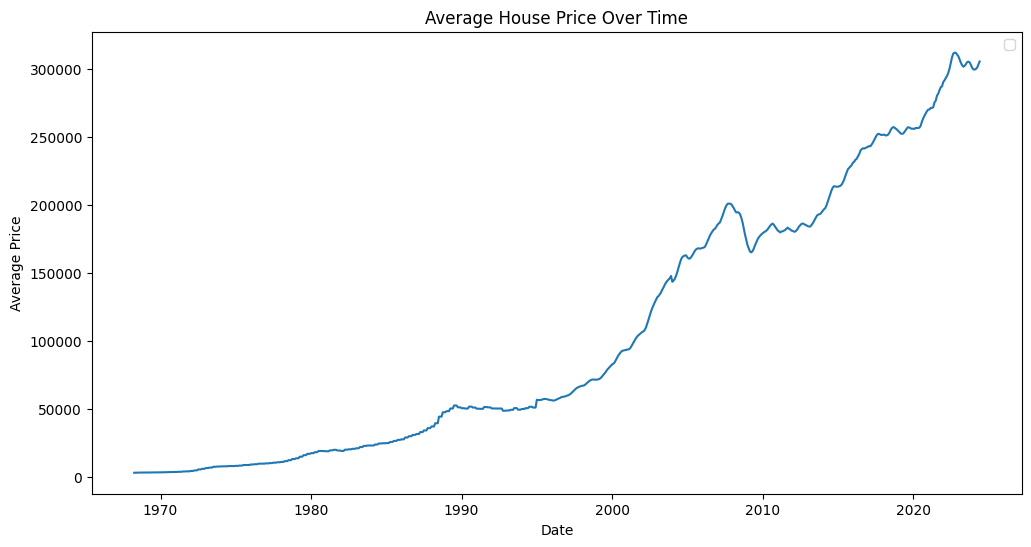

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(average_price_over_time['Date'], average_price_over_time['Average_Price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average House Price Over Time')
plt.legend()
plt.show()